In [ ]:
# https://drive.google.com/uc?export=download&confirm=mfh4&id=1hGVp7cqisPBxXtPm0HyYbWizZ7K0M5oZ
# https://drive.google.com/file/d/1UI-2m9UGNJ-UnPEYqEZVW-jxnHYE5xaD/view?usp=sharing
"""
!pip install wget

import wget
url = "https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a43387856556b744d6d30355655644f53693156626c424657584646576c5a584c577034626b685a5254563459555176646d6c6c64773d3d?dl=3"
wget.download(url, "/tmp/twitter.csv")
"""

!wget --no-check-certificate \
    https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a43387856556b744d6d30355655644f53693156626c424657584646576c5a584c577034626b685a5254563459555176646d6c6c64773d3d?dl=3 \
    -O /tmp/Twitter.csv

--2020-09-17 05:02:57--  https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a43387856556b744d6d30355655644f53693156626c424657584646576c5a584c577034626b685a5254563459555176646d6c6c64773d3d?dl=3
Resolving gigafilehost.com (gigafilehost.com)... 104.18.32.229, 104.18.33.229, 172.67.164.124, ...
Connecting to gigafilehost.com (gigafilehost.com)|104.18.32.229|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/03luogcrs4m79tobi9etipbbfjku69eo/1600318950000/05300042213365893851/*/1UI-2m9UGNJ-UnPEYqEZVW-jxnHYE5xaD?e=download [following]
--2020-09-17 05:02:59--  https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/03luogcrs4m79tobi9etipbbfjku69eo/1600318950000/05300042213365893851/*/1UI-2m9UGNJ-UnPEYqEZVW-jxnHYE5xaD?e=download
Resolving doc-0c-50-docs.googleuserconten

In [ ]:
# !pip install iconv
# iconv -f LATIN1 -t UTF8 Twitter.csv -o twitter.csv

import pandas as pd

df = pd.read_csv("/tmp/Twitter.csv", encoding = "ISO-8859-1", names = ["label", "IDs", "Timestamp", "Query", "User", "Sentence"])
df.head()

,label,IDs,Timestamp,Query,User,Sentence
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df["label"].value_counts()

4    800000
0    800000
Name: label, dtype: int64

In [ ]:
df = df.sample(frac = 1)
corpus = df["Sentence"].values.tolist()
print("No. of sentences ---> ", len(corpus))
labels = df["label"].replace(4, 1).values.tolist()

print("First label and sentence is:\n", str(labels[1]) + "----->" + corpus[1])

No. of sentences --->  1600000
First label and sentence is:
 0----->Not feeling well again  I think Iv got food poisoning :-S


In [ ]:
set(labels)

{0, 1}

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import numpy as np
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display


trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .9
# num_epochs = 50
embedding_dim = 100
max_length = 32



# Tokenizing Sentences
token = Tokenizer(oov_token = oov_tok)
token.fit_on_texts(corpus)
word_idx = token.word_index
sequences = token.texts_to_sequences(corpus)
padded_val = pad_sequences(sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

vocab_size = len(word_idx)
print("vocabulary size is ---> ", vocab_size)

# No Need to to tokenize labels as labels are numerical


training_size = int(len(labels) * training_portion)

training_padded = padded_val[0:training_size]
testing_padded = padded_val[training_size:]
training_label = labels[0:training_size]
testing_label = labels[training_size:]



# Note this is the 100 dimension version of GloVe from Stanford
# Got this from Laurence's repo


!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_idx.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

print("Length of embedding matrix: ", len(embeddings_matrix))




/usr/local/lib/python3.6/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


vocabulary size is --->  690961
--2020-09-17 05:07:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M   189MB/s    in 1.8s    

2020-09-17 05:08:01 (189 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]

Length of embedding matrix:  690962


In [ ]:
len(training_padded)

1440000

In [ ]:
train_padded = np.array(training_padded)
train_label = np.array(training_label)
test_padded = np.array(testing_padded)
test_label = np.array(testing_label)

epochs = 50

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


history = model.fit(train_padded, train_label, epochs=epochs, validation_data=(test_padded, test_label), verbose=1)

print("Training Done....!!!!")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           69096200  
_________________________________________________________________
dropout (Dropout)            (None, 32, 100)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 28, 64)            32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 7, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 69,161,353
Trainable params: 65,153
Non-trainable params: 69,096,200
_______________________________________

<Figure size 432x288 with 0 Axes>

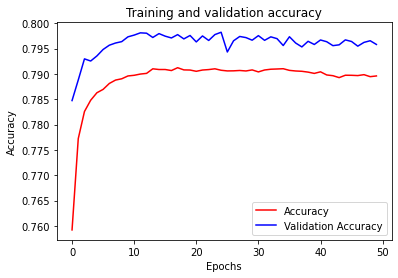

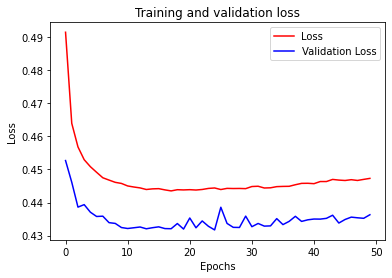

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

## **Let's use a different model**

In [ ]:
model2 = tf.keras.Sequential([
             tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Conv1D(128, 5, activation='relu'),
             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, return_sequences=True)),
             tf.keras.layers.GlobalAveragePooling1D(),
             tf.keras.layers.Dense(128, activation = "relu"),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Dense(1, activation = "sigmoid")                                   
])


model2.compile(optimizer = Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
              loss = "binary_crossentropy", 
              metrics = ["accuracy"])
  
model2.summary()


early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=20, verbose = 1, restore_best_weights=True)
  
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.5, patience=12, verbose = 1,
    min_delta=0.01, min_lr=0.001)

history2 = model2.fit(train_padded, train_label, epochs=50, validation_data=(test_padded, test_label), callbacks = [early_stop, reduce_lr], verbose = 1)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 100)           69096200  
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 128)           64128     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 28, 64)            41216     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 28, 16)            4672      
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history2.history['accuracy']
val_acc=history2.history2['val_accuracy']
loss=history2.history2['loss']
val_loss=history2.history2['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

NameError: ignored